In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importar datos:

In [49]:
df = pd.read_csv("incident_event_log.csv")


Análisis exploratorio problema 1 y 3:

In [59]:
#Cambiar categoricas por variables dummies:
df2= df
df2 = pd.get_dummies(df2, columns=["impact", "urgency", "priority","notify"], drop_first=False)

df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,impact_3 - Low,urgency_1 - High,urgency_2 - Medium,urgency_3 - Low,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,notify_Do Not Notify,notify_Send Email
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,True,False,False,False,True,False,True,False
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,False,True,False,False,False,True,False,True,False


In [60]:
#Sacar un data frame que contenga unicamente las variables de nuestra interés:
df2= df2.drop(["number","incident_state","caller_id","opened_by","opened_at","sys_created_by","sys_created_at","sys_updated_by","sys_updated_at",
              "contact_type","location","category","subcategory","u_symptom","cmdb_ci","assignment_group","assigned_to","problem_id",
              "rfc","vendor","caused_by","closed_code","resolved_by","resolved_at","closed_at"], axis=1)

#Correlación con made_sla
df2.corrwith(df2["made_sla"])

active                     0.565501
reassignment_count        -0.089037
reopen_count              -0.015880
sys_mod_count             -0.241942
made_sla                   1.000000
knowledge                 -0.073070
u_priority_confirmation   -0.232037
impact_1 - High           -0.034893
impact_2 - Medium          0.005965
impact_3 - Low             0.025006
urgency_1 - High          -0.044749
urgency_2 - Medium         0.017464
urgency_3 - Low            0.022189
priority_1 - Critical     -0.027008
priority_2 - High         -0.042490
priority_3 - Moderate      0.022449
priority_4 - Low           0.023597
notify_Do Not Notify       0.024959
notify_Send Email         -0.024959
dtype: float64

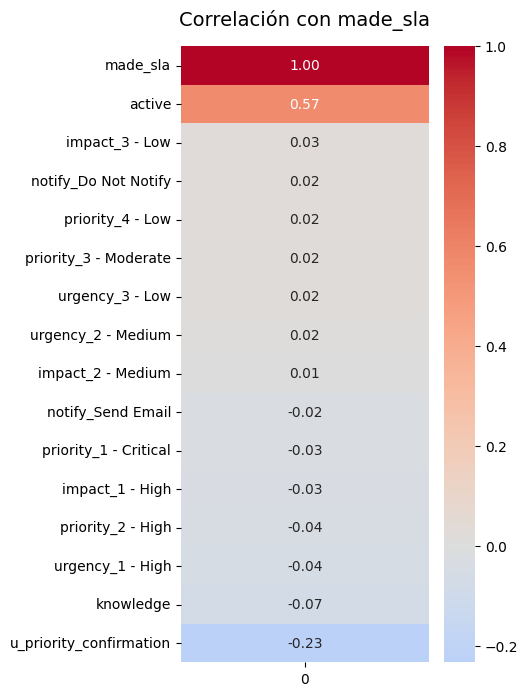

In [95]:
#Grafica para comparar con las variables categoricas:
df3 = df2.drop(["reassignment_count","reopen_count","sys_mod_count"],axis=1)

# Graficar mapa de calor:

corr = ((df3.corrwith(df3["made_sla"]))).sort_values(ascending=False)

plt.figure(figsize=(4,8))
sns.heatmap(
    corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("Correlación con made_sla", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Relación made_sla y reassignment_count')

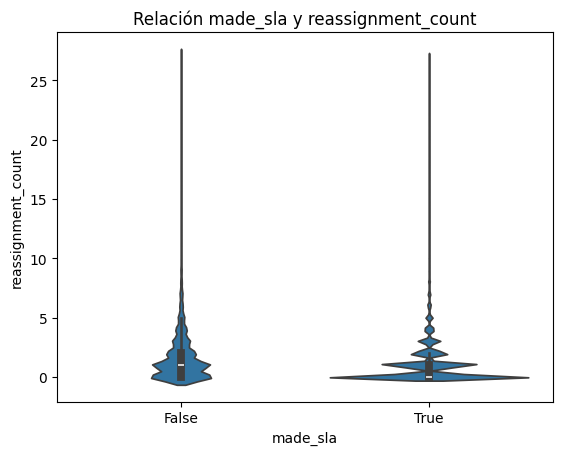

In [69]:
#Gráfica categoricas vs. continuas

sns.violinplot(data=df, x=df["made_sla"], y=df["reassignment_count"])
plt.title("Relación made_sla y reassignment_count")


Text(0.5, 1.0, 'Relación made_sla y reopen_count')

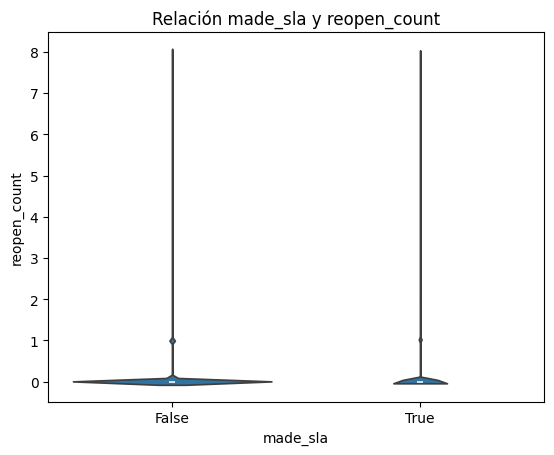

In [70]:
sns.violinplot(data=df, x=df["made_sla"], y=df["reopen_count"])
plt.title("Relación made_sla y reopen_count")

Text(0.5, 1.0, 'Relación made_sla y sys_mod_count')

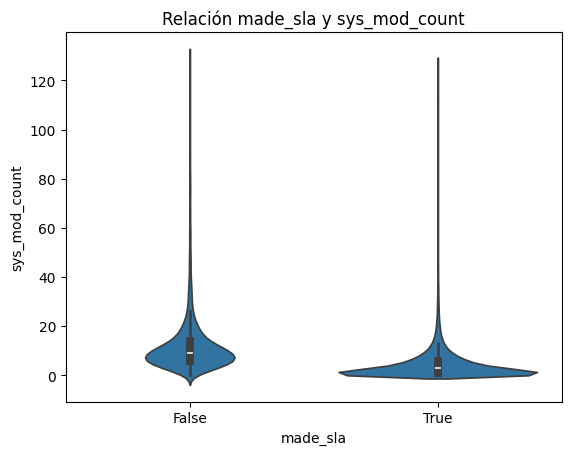

In [71]:
sns.violinplot(data=df, x=df["made_sla"], y=df["sys_mod_count"])
plt.title("Relación made_sla y sys_mod_count")

Análisis exploratorio para el problema 2:

In [72]:
#Generar un df que contenga unicamente los datos a comparar
df_nuevo = df[["location", "impact"]]
df_problema2 = pd.get_dummies(df_nuevo, columns=["location","impact"], drop_first=False)
df_problema2

,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,location_Location 106,location_Location 107,location_Location 108,location_Location 109,...,location_Location 93,location_Location 94,location_Location 95,location_Location 96,location_Location 97,location_Location 98,location_Location 99,impact_1 - High,impact_2 - Medium,impact_3 - Low
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [73]:
#Contar la cantidad de datos que hay por ubicación:

cantidad = df_problema2.sum()
cantidad

location_?                   76
location_Location 10         13
location_Location 100         6
location_Location 101         4
location_Location 102         5
                          ...  
location_Location 98         10
location_Location 99        129
impact_1 - High            3491
impact_2 - Medium        134335
impact_3 - Low             3886
Length: 228, dtype: int64

In [80]:
#Matriz de varianzas y covarianzas:
matriz_correlaciones = df_problema2.corr()
matriz_correlaciones

,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,location_Location 106,location_Location 107,location_Location 108,location_Location 109,...,location_Location 93,location_Location 94,location_Location 95,location_Location 96,location_Location 97,location_Location 98,location_Location 99,impact_1 - High,impact_2 - Medium,impact_3 - Low
location_?,1.000000,-0.000222,-0.000151,-0.000123,-0.000138,-0.000185,-0.000107,-0.000672,-0.007244,-0.000394,...,-0.006902,-0.000123,-0.000123,-0.002143,-0.001538,-0.000195,-0.000699,0.006150,-0.011037,0.009175
location_Location 10,-0.000222,1.000000,-0.000062,-0.000051,-0.000057,-0.000076,-0.000044,-0.000278,-0.002995,-0.000163,...,-0.002854,-0.000051,-0.000051,-0.000886,-0.000636,-0.000080,-0.000289,-0.001522,-0.007706,0.011927
location_Location 100,-0.000151,-0.000062,1.000000,-0.000035,-0.000039,-0.000052,-0.000030,-0.000189,-0.002035,-0.000111,...,-0.001939,-0.000035,-0.000035,-0.000602,-0.000432,-0.000055,-0.000196,-0.001034,-0.008239,0.012189
location_Location 101,-0.000123,-0.000051,-0.000035,1.000000,-0.000032,-0.000042,-0.000024,-0.000154,-0.001661,-0.000090,...,-0.001583,-0.000028,-0.000028,-0.000492,-0.000353,-0.000045,-0.000160,-0.000844,0.001245,-0.000892
location_Location 102,-0.000138,-0.000057,-0.000039,-0.000032,1.000000,-0.000047,-0.000027,-0.000172,-0.001857,-0.000101,...,-0.001770,-0.000032,-0.000032,-0.000550,-0.000394,-0.000050,-0.000179,-0.000944,0.001392,-0.000997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Location 98,-0.000195,-0.000080,-0.000055,-0.000045,-0.000050,-0.000067,-0.000039,-0.000244,-0.002627,-0.000143,...,-0.002503,-0.000045,-0.000045,-0.000777,-0.000558,1.000000,-0.000254,-0.001335,0.001969,-0.001411
location_Location 99,-0.000699,-0.000289,-0.000196,-0.000160,-0.000179,-0.000241,-0.000139,-0.000875,-0.009439,-0.000514,...,-0.008993,-0.000160,-0.000160,-0.002793,-0.002004,-0.000254,1.000000,-0.004797,0.007074,-0.005068
impact_1 - High,0.006150,-0.001522,-0.001034,-0.000844,-0.000944,-0.001267,-0.000731,0.009537,-0.018852,-0.002704,...,-0.014577,-0.000844,-0.000844,0.007624,-0.005731,-0.001335,-0.004797,1.000000,-0.678176,-0.026685
impact_2 - Medium,-0.011037,-0.007706,-0.008239,0.001245,0.001392,0.001868,0.001078,-0.003077,0.021981,0.003987,...,0.009340,0.001245,0.001245,-0.012249,0.009312,0.001969,0.007074,-0.678176,1.000000,-0.716540


In [81]:
#Ordenar correlación 

matriz_correlaciones = matriz_correlaciones.drop(
    [col for col in matriz_correlaciones.columns if "impact" in col],
    axis=0 
)
matriz_correlaciones = matriz_correlaciones.drop(
    [col for col in matriz_correlaciones.columns if "location" in col],
    axis=1  
)
matriz_correlaciones



,impact_1 - High,impact_2 - Medium,impact_3 - Low
location_?,0.006150,-0.011037,0.009175
location_Location 10,-0.001522,-0.007706,0.011927
location_Location 100,-0.001034,-0.008239,0.012189
location_Location 101,-0.000844,0.001245,-0.000892
location_Location 102,-0.000944,0.001392,-0.000997
...,...,...,...
location_Location 95,-0.000844,0.001245,-0.000892
location_Location 96,0.007624,-0.012249,0.009425
location_Location 97,-0.005731,0.009312,-0.007227
location_Location 98,-0.001335,0.001969,-0.001411


In [86]:
#sacar las ubiaciones de mayor correlación con cada tipo de impacto:

matriz_high = matriz_correlaciones["impact_1 - High"]
top5_high_postivo = matriz_high.nlargest(5)
top5_high_negativo = matriz_high.nsmallest(5)

matriz_medium = matriz_correlaciones["impact_2 - Medium"]
top5_medium_positivo = matriz_medium.nlargest(5)
top5_medium_negativo = matriz_medium.nsmallest(5)

matriz_low = matriz_correlaciones["impact_3 - Low"]
top5_low_positivo = matriz_low.nlargest(5)
top5_low_negativo = matriz_low.nsmallest(5)

print("Las ubicaciones de mayor correlacion con los incidentes de impacto high son: ",top5_high_postivo,
      "Las ubicaciones de mayor correlacion con los incidentes de impacto medium son: ",top5_medium_positivo,
      "Las ubicaciones de mayor correlacion con los incidentes de impacto low son: ",top5_low_positivo)

Las ubicaciones de mayor correlacion con los incidentes de impacto high son:  location_Location 17     0.061710
location_Location 116    0.057905
location_Location 41     0.055072
location_Location 76     0.047507
location_Location 22     0.040944
Name: impact_1 - High, dtype: float64 Las ubicaciones de mayor correlacion con los incidentes de impacto medium son:  location_Location 108    0.021981
location_Location 46     0.017021
location_Location 161    0.013945
location_Location 82     0.012608
location_Location 43     0.012086
Name: impact_2 - Medium, dtype: float64 Las ubicaciones de mayor correlacion con los incidentes de impacto low son:  location_Location 188    0.120857
location_Location 246    0.067124
location_Location 118    0.062211
location_Location 11     0.032111
location_Location 214    0.028764
Name: impact_3 - Low, dtype: float64


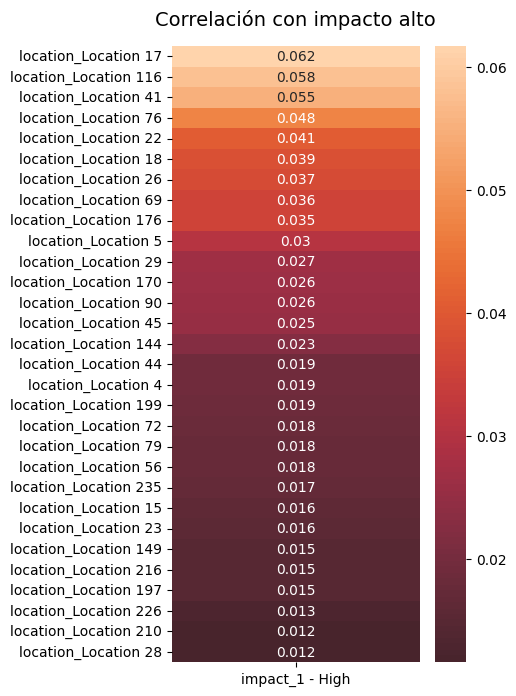

In [ ]:
#Mapa de calor

top30_High= matriz_high.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_High,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto alto", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

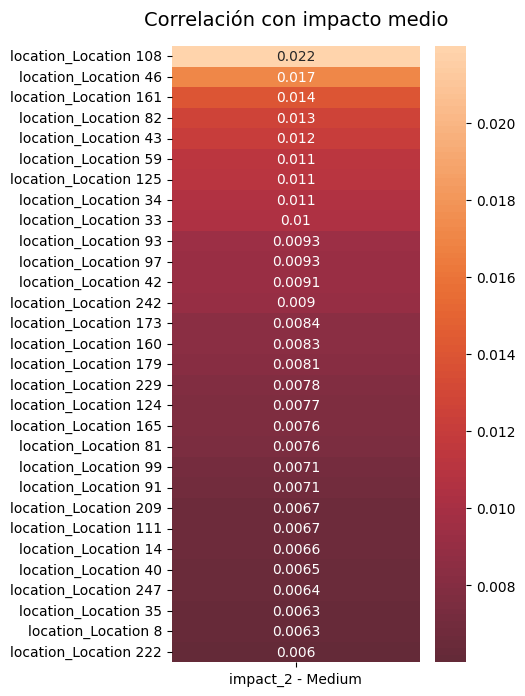

In [96]:
#Mapa de calor

top30_medium= matriz_medium.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_medium,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto medio", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

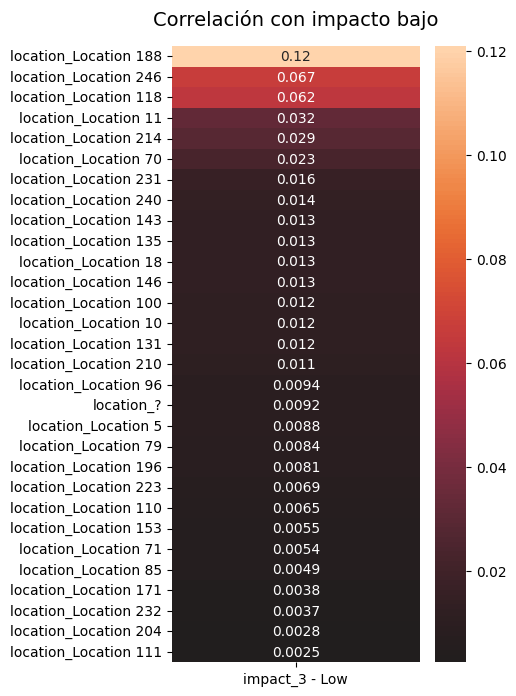

In [98]:
#Mapa de calor

top30_low= matriz_low.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_low,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto bajo", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()